In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Display all the columns of the dataframe
pd.set_option('display.max_rows', 130)  # to view all 122 rows
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)  # avoid column wrapping

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv(r"D:\Projects\EDA_analysis\dataset\LoanPredictionProblemDataset\train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:

X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]


In [35]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [36]:
X["Total_Income"]= X["ApplicantIncome"] + X["CoapplicantIncome"]

In [37]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0


In [38]:
X.drop(["ApplicantIncome", "CoapplicantIncome"], axis=1, inplace=True)

In [39]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0


In [40]:
missing_columns = {feature: np.round(df[feature].isnull().mean()*100, 2)
                    for feature in df.columns if df[feature].isnull().sum() > 0}
## Covert to a series and soort
missing_series = pd.Series(missing_columns).sort_values(ascending=False)

print(f"The number of missing columns is: {len(missing_series)} \nThe columns names of the missing value is stated below: \n{missing_series}")

The number of missing columns is: 7 
The columns names of the missing value is stated below: 
Credit_History      8.14
Self_Employed       5.21
LoanAmount          3.58
Dependents          2.44
Loan_Amount_Term    2.28
Gender              2.12
Married             0.49
dtype: float64


In [41]:
##imputing missing value
X["Credit_History"].fillna(X["Credit_History"].mode()[0], inplace=True)
X["Loan_Amount_Term"].fillna(X["Loan_Amount_Term"].mode()[0], inplace=True)
X["Self_Employed"].fillna(X["Self_Employed"].mode()[0], inplace=True)
X["Dependents"].fillna(X["Dependents"].mode()[0], inplace=True)
X["Married"].fillna(X["Married"].mode()[0], inplace=True)
X["Gender"].fillna(X["Gender"].mode()[0], inplace=True)
X["LoanAmount"].fillna(X["LoanAmount"].median(), inplace=True)

In [42]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0


In [43]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [44]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [45]:
X["Gender"] = X["Gender"].map({"Male":1,"Female":0})
X["Married"] = X["Married"].map({"Yes":1,"No":0})
X["Education"] = X["Education"].map({"Graduate":1,"Not Graduate":0})
X["Self_Employed"] = X["Self_Employed"].map({"Yes":1,"No":0})
X["Property_Area"] = X["Property_Area"].map({"Rural":1,"Semiurban":2,"Urban":3})
X["Loan_Amount_Term"].replace({36:360,12:360,480:360}, inplace=True)
X["Dependents"] = X["Dependents"].replace({"3+":3})
X["Dependents"] =X["Dependents"].astype(float)

In [46]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0.0,1,0,128.0,360.0,1.0,3,5849.0
1,1,1,1.0,1,0,128.0,360.0,1.0,1,6091.0
2,1,1,0.0,1,1,66.0,360.0,1.0,3,3000.0
3,1,1,0.0,0,0,120.0,360.0,1.0,3,4941.0
4,1,0,0.0,1,0,141.0,360.0,1.0,3,6000.0


In [47]:
X.dtypes

Gender                int64
Married               int64
Dependents          float64
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
Total_Income        float64
dtype: object

In [48]:
# Small value added to avoid log(0)
X["TotalIncome_log"] = np.log1p(X["Total_Income"])
X["LoanAmount_log"] = np.log1p(X["LoanAmount"])

In [49]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,TotalIncome_log,LoanAmount_log
0,1,0,0.0,1,0,128.0,360.0,1.0,3,5849.0,8.674197,4.859812
1,1,1,1.0,1,0,128.0,360.0,1.0,1,6091.0,8.714732,4.859812
2,1,1,0.0,1,1,66.0,360.0,1.0,3,3000.0,8.006701,4.204693
3,1,1,0.0,0,0,120.0,360.0,1.0,3,4941.0,8.505525,4.795791
4,1,0,0.0,1,0,141.0,360.0,1.0,3,6000.0,8.699681,4.955827


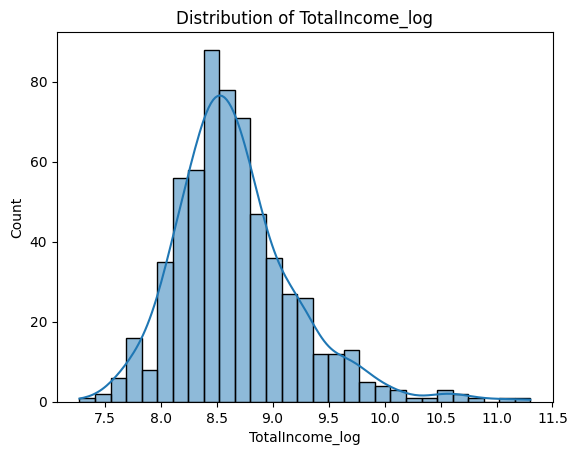

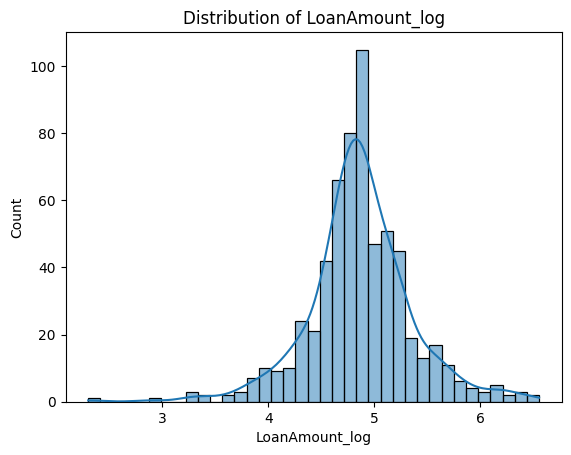

In [50]:
for col in ["TotalIncome_log", "LoanAmount_log"]:
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [51]:
print(X["TotalIncome_log"].skew())
print(X["LoanAmount_log"].skew())

1.077048263350872
-0.15157750539614048


TotalIncome_log: 1.077  → moderately to highly right-skewed
LoanAmount_log: -0.151  → close to normal (slightly left-skewed)


In [52]:
X.drop(["Total_Income", "LoanAmount"], axis=1, inplace=True)


In [53]:
for col in ["TotalIncome_log", "LoanAmount_log"]:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = X[(X[col] < lower) | (X[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

TotalIncome_log: 22 outliers
LoanAmount_log: 39 outliers


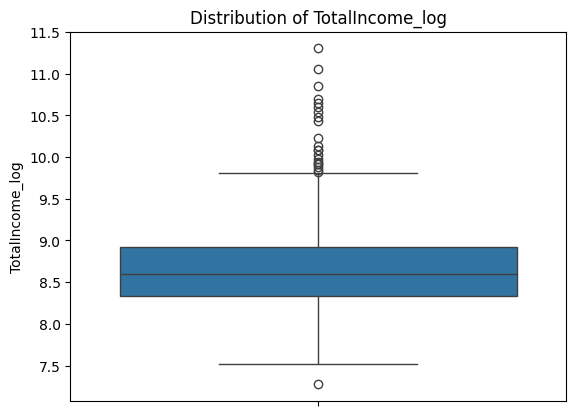

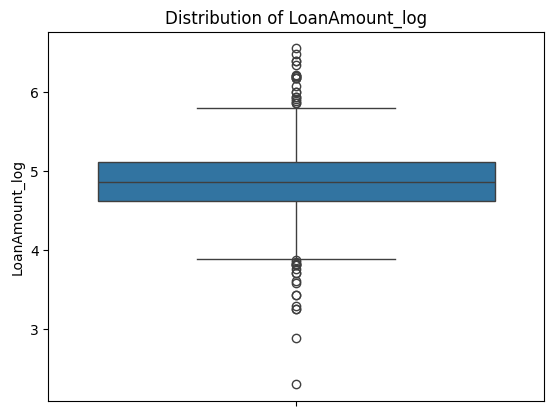

In [54]:
for col in ["TotalIncome_log", "LoanAmount_log"]:
    sns.boxplot(X[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [55]:
from scipy.stats.mstats import winsorize

# Cap extreme values (1st and 99th percentiles)
X['TotalIncome_log'] = winsorize(X['TotalIncome_log'], limits=[0.01, 0.01])
X['LoanAmount_log'] = winsorize(X['LoanAmount_log'], limits=[0.01, 0.0])


In [56]:
for col in ["TotalIncome_log", "LoanAmount_log"]:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = X[(X[col] < lower) | (X[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

TotalIncome_log: 21 outliers
LoanAmount_log: 39 outliers


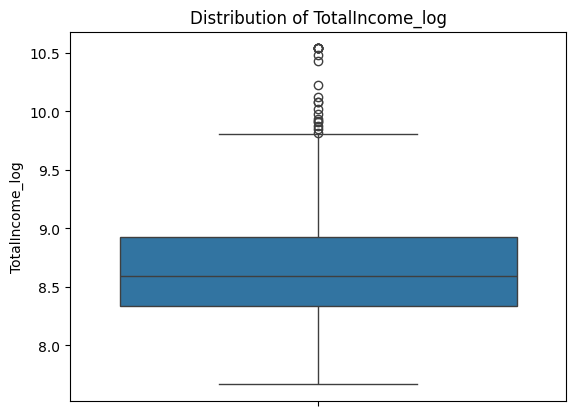

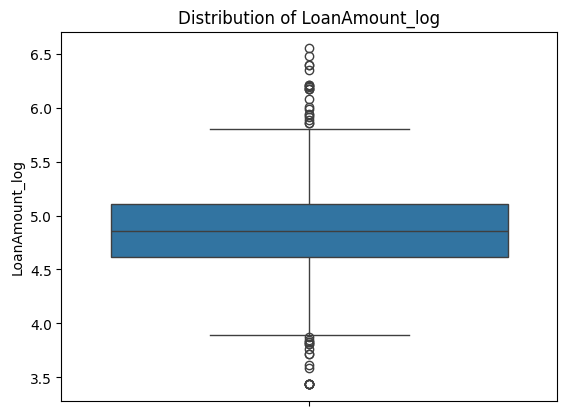

In [57]:
for col in ["TotalIncome_log", "LoanAmount_log"]:
    sns.boxplot(X[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [59]:
print(type(y)) 


<class 'pandas.core.series.Series'>


In [60]:
y = y.map({"Y":1, "N": 0})

In [62]:
print(y.head())
print(y.value_counts())
print(y.shape)  

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64
Loan_Status
1    422
0    192
Name: count, dtype: int64
(614,)


In [63]:
X.to_csv("data_transformed.csv", index=False)
y.to_csv("data_output.csv", index=False)